In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import pathlib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_dir = 'Downloads/task8'

In [3]:
train_csv = pd.read_csv(os.path.join(data_dir,'Train.csv'))

In [4]:
train_csv

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


In [5]:
x,y = [], []

In [6]:
for i, row in train_csv.iterrows():
    iamge_path = os.path.join(data_dir, row["Path"])
    image = cv2.imread(iamge_path)
    image = cv2.resize(image, (32,32))
    x.append(image)
    y.append(row['ClassId'])

In [7]:
x = np.array(x)/255.0

In [8]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(y)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=np.argmax(y, axis=1)
)

In [10]:
x_train.shape, x_test.shape

((31367, 32, 32, 3), (7842, 32, 32, 3))

In [11]:
y_train.shape, y_test.shape

((31367, 43), (7842, 43))

In [12]:
datagen = ImageDataGenerator(rotation_range = 10, zoom_range=0.15,
                             width_shift_range=0.1, height_shift_range=0.1)

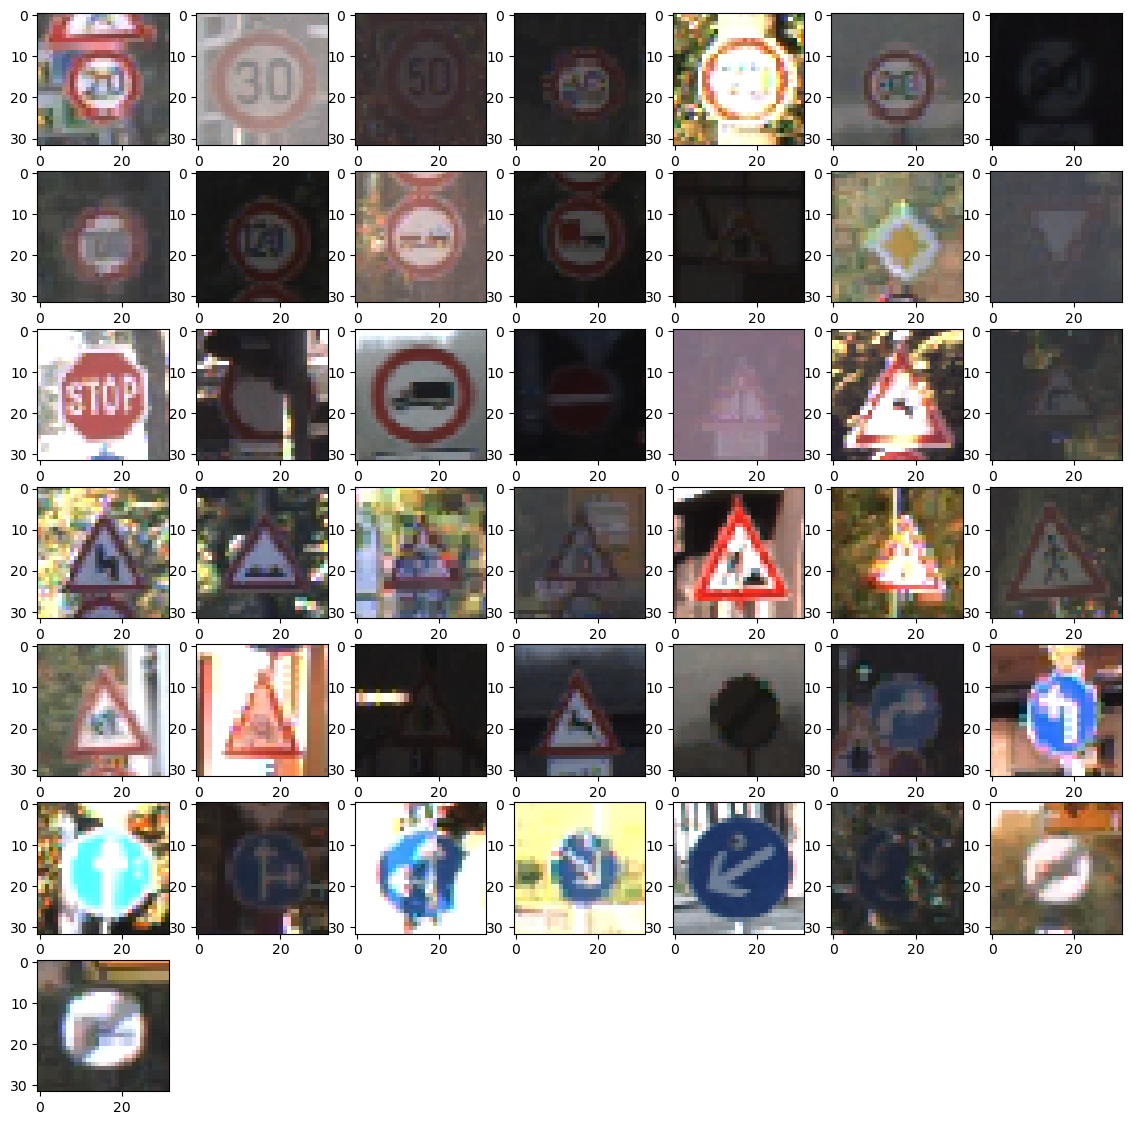

In [13]:
num_cat=43
img_width, img_height = 32,32 
train_path = os.path.join(data_dir,"Train")
img_dir = pathlib.Path(train_path)
plt.figure(figsize = (14,14))
for i in range(num_cat):
    plt.subplot(7, 7, i+1)
    sign = list(img_dir.glob('{}/*'.format(i)))[0]
    img = load_img(sign, target_size = (img_width, img_height))
    plt.imshow(img)
plt.show()

In [14]:
# Building CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')  # 43 classes
])

In [15]:
# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Training Model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), validation_data=(x_test, y_test), epochs=15)

# flow() works with NumPy arrays

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 49s 47ms/step - accuracy: 0.4020 - loss: 2.0335 - val_accuracy: 0.7999 - val_loss: 0.6611
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 48s 49ms/step - accuracy: 0.7767 - loss: 0.6951 - val_accuracy: 0.9126 - val_loss: 0.2721
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.8769 - loss: 0.3834 - val_accuracy: 0.9653 - val_loss: 0.1218
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.9181 - loss: 0.2636 - val_accuracy: 0.9773 - val_loss: 0.0920
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 46s 47ms/step - accuracy: 0.9394 - loss: 0.1957 - val_accuracy: 0.9818 - val_loss: 0.0591
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.9489 - loss: 0.1650 - val_accuracy: 0.9866 - val_loss: 0.0435
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.9607 - loss: 0.1296 - val_accuracy: 0.9884 - val_loss: 0.0384
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.9625 - loss: 0.1197 - 

In [17]:
# Evaluate Model
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9940 - loss: 0.0199
Test Accuracy: 99.40%


Text(0.5, 1.0, 'Model Accuracy')

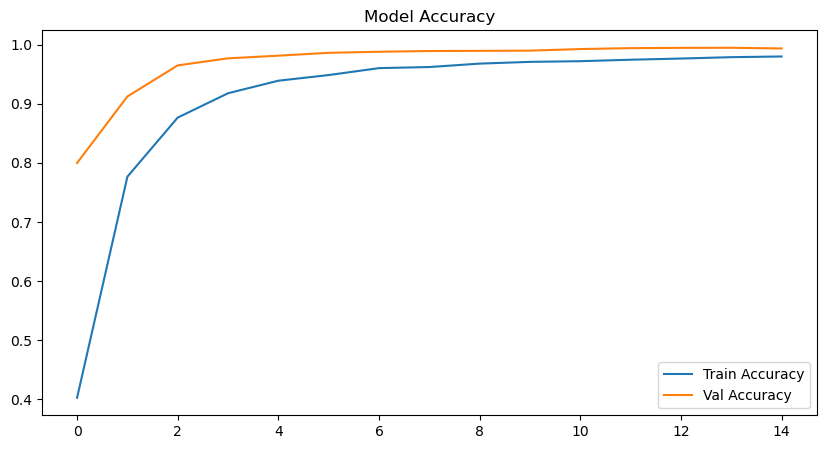

In [18]:
# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')

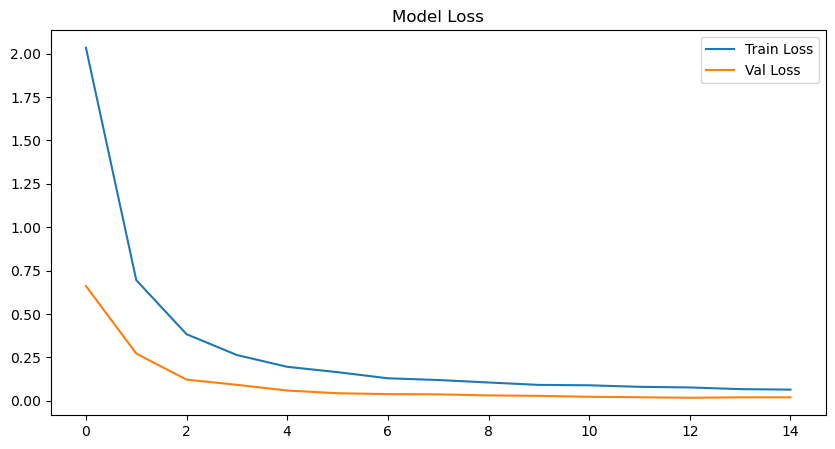

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [22]:
# Predict Sample Images
def predict_sample_images():
    fig, axes = plt.subplots(3, 5 , figsize=(12, 8))
    for i, ax in enumerate(axes.flat):
        img = x_test[i]
        true_label = np.argmax(y_test[i])
        pred_label = np.argmax(model.predict(img[np.newaxis, ...], verbose=0))
        ax.imshow(img)
        ax.set_title(f"Pred: {pred_label} | True: {true_label}")
        ax.axis('off')
    plt.show()


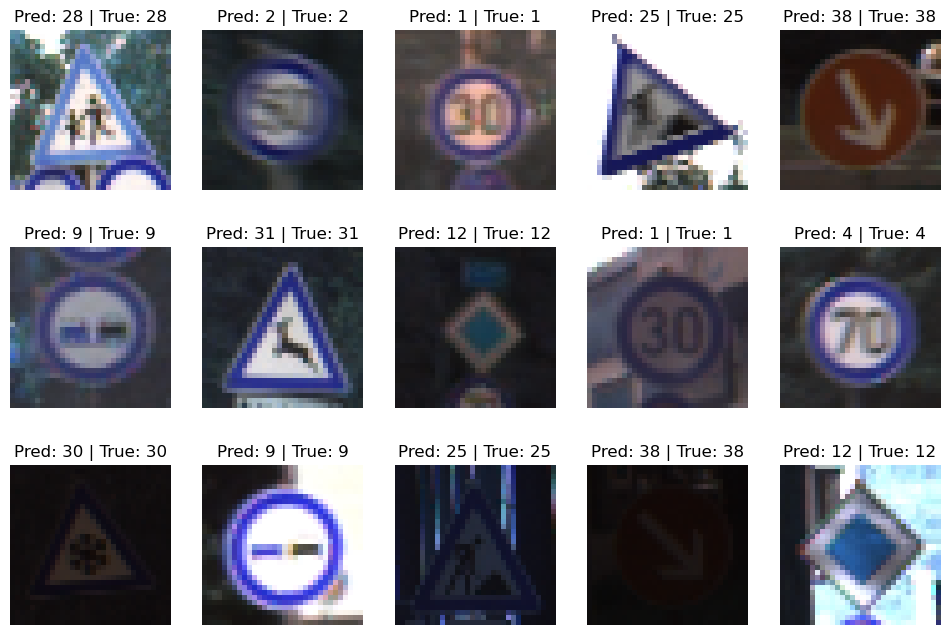

In [23]:
predict_sample_images()

In [24]:
 #Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }